<a href="https://colab.research.google.com/github/ArnobMith/Arnob/blob/master/test_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1

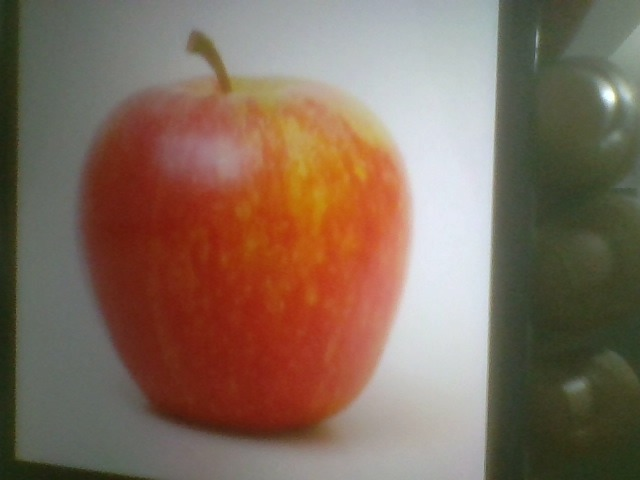

In [ ]:
from google.colab.output import eval_js
from base64 import b64decode
from IPython.display import Image

# Define the function to capture the photo
js_code = """
async function capturePhoto() {
  const video = document.createElement('video');
  video.style.display = 'block';
  const stream = await navigator.mediaDevices.getUserMedia({video: true});

  const div = document.createElement('div');
  document.body.appendChild(div);
  div.appendChild(video);
  video.srcObject = stream;
  await video.play();

  // Wait for Capture to be clicked (ensure you have a button for this)
  await new Promise((resolve) => {
    window.capture = resolve; // Expose a capture function to the window object
    document.body.insertAdjacentHTML('beforeend', '<button onclick="capture()">Capture</button>');
  });

  // Capture the image after button click
  const canvas = document.createElement('canvas');
  canvas.width = video.videoWidth;
  canvas.height = video.videoHeight;
  canvas.getContext('2d').drawImage(video, 0, 0);

  // Stop the video stream
  stream.getTracks()[0].stop();
  div.remove();

  // Return the image data as base64
  return canvas.toDataURL('image/jpeg', 0.92);
}

capturePhoto();
"""

# Use eval_js to run the JavaScript code
data = eval_js(js_code)

# Decode the base64 string into binary data
binary = b64decode(data.split(',')[1])

# Save the image to a file
filename = '/content/photo.jpg'  # You can change the filename
with open(filename, 'wb') as f:
    f.write(binary)

# Display the saved image
Image(filename)



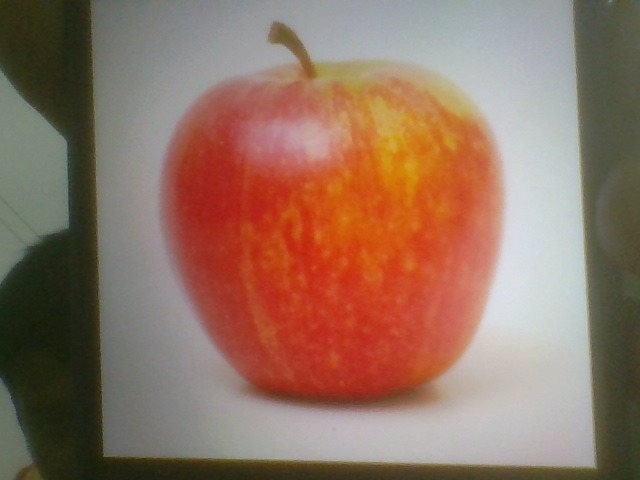

In [ ]:
from google.colab import output

output.eval_js("""
  async function takePhoto() {
    const video = document.createElement('video');
    const stream = await navigator.mediaDevices.getUserMedia({ video: true });
    document.body.appendChild(video);
    video.srcObject = stream;
    await video.play();

    return new Promise(resolve => {
      setTimeout(() => {
        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);
        stream.getTracks()[0].stop();
        video.remove();
        resolve(canvas.toDataURL('image/jpeg'));
      }, 3000);  // Auto capture after 3 seconds
    });
  }
""")
data = output.eval_js("takePhoto()")

# Convert base64 to image
import base64
from IPython.display import Image
image_data = base64.b64decode(data.split(',')[1])
filename = "captured_photo.jpg"
with open(filename, "wb") as f:
    f.write(image_data)

Image(filename)


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import DepthwiseConv2D
from tensorflow.keras.models import load_model
from tensorflow.keras import layers

# Define a custom DepthwiseConv2D layer that handles 'groups' argument
class CustomDepthwiseConv2D(DepthwiseConv2D):
    def __init__(self, *args, **kwargs):
        # Remove 'groups' if it exists in the kwargs to avoid issues
        if 'groups' in kwargs:
            del kwargs['groups']
        super().__init__(*args, **kwargs)

# Register the custom layer with Keras
tf.keras.utils.get_custom_objects().update({'CustomDepthwiseConv2D': CustomDepthwiseConv2D})

# Load the model with the custom layer
model = load_model('/content/keras_model.h5', custom_objects={'DepthwiseConv2D': CustomDepthwiseConv2D}, compile=False)

# Check model summary to confirm everything loaded correctly
model.summary()

# Compile the model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

# Now you can use the model for inference or further training


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)            │ (None, 1280)                │         410,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_5 (Sequential)            │ (None, 3)                   │         128,400 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 538,608 (2.05 MB)

 Trainable params: 524,528 (2.00 MB)

 Non-trainable params: 14,080 (55.00 KB)

In [ ]:


# Image resizing function
from PIL import Image

def resize_image(src_img, size=(224, 224), bg_color="white"):
    src_img.thumbnail(size, Image.ANTIALIAS)
    return src_img


# 2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import DepthwiseConv2D
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import get_custom_objects

# Define a custom DepthwiseConv2D layer to handle 'groups'
class CustomDepthwiseConv2D(DepthwiseConv2D):
    def __init__(self, *args, **kwargs):
        # Remove 'groups' if it exists in the kwargs to avoid issues
        if 'groups' in kwargs:
            del kwargs['groups']
        super().__init__(*args, **kwargs)

# Register the custom DepthwiseConv2D layer with Keras
get_custom_objects().update({'CustomDepthwiseConv2D': CustomDepthwiseConv2D})

# Load the model with the custom layer
model_path = '/content/keras_model.h5'

# Load the model using custom objects (custom DepthwiseConv2D layer)
model = load_model(model_path, custom_objects={'DepthwiseConv2D': CustomDepthwiseConv2D}, compile=False)

# Display model summary to confirm everything loaded correctly
model.summary()

# Compile the model (if necessary)
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)            │ (None, 1280)                │         410,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_5 (Sequential)            │ (None, 3)                   │         128,400 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 538,608 (2.05 MB)

 Trainable params: 524,528 (2.00 MB)

 Non-trainable params: 14,080 (55.00 KB)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import DepthwiseConv2D
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import get_custom_objects
from PIL import Image
import numpy as np

# Define a custom DepthwiseConv2D layer to handle 'groups'
class CustomDepthwiseConv2D(DepthwiseConv2D):
    def __init__(self, *args, **kwargs):
        # Remove 'groups' if it exists in the kwargs to avoid issues
        if 'groups' in kwargs:
            del kwargs['groups']
        super().__init__(*args, **kwargs)

# Register the custom DepthwiseConv2D layer with Keras
get_custom_objects().update({'CustomDepthwiseConv2D': CustomDepthwiseConv2D})

# Load the model without compiling initially, with the custom DepthwiseConv2D layer
model = load_model('/content/keras_model.h5', custom_objects={'DepthwiseConv2D': CustomDepthwiseConv2D}, compile=False)

# Display model summary
model.summary()

# Compile the model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

def resize_image(src_img, size=(224, 224), bg_color="white"):
    """Resizes an image to the specified size while maintaining aspect ratio."""
    img = src_img.convert("RGB")
    img = img.resize(size, Image.LANCZOS)
    return img

def preprocess_image(image_path):
    """Loads and preprocesses an image for model prediction."""
    img = Image.open(image_path)
    img = resize_image(img)
    img = np.array(img) / 255.0  # Normalize pixel values
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

def predict_image(image_path):
    """Runs model prediction on an image."""
    img = preprocess_image(image_path)
    predictions = model.predict(img)
    predicted_class = np.argmax(predictions, axis=1)
    return predicted_class

# Example usage
image_path = '/content/captured_photo.jpg'
predicted_class = predict_image(image_path)
print("Predicted Class:", predicted_class)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)            │ (None, 1280)                │         410,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_5 (Sequential)            │ (None, 3)                   │         128,400 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 538,608 (2.05 MB)

 Trainable params: 524,528 (2.00 MB)

 Non-trainable params: 14,080 (55.00 KB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted Class: [0]


In [ ]:
import os

file_path = "/content/keras_model.h5"
print("File exists:", os.path.exists(file_path))


File exists: True


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install tensorflow --upgrade


In [ ]:
from PIL import Image
import numpy as np

def resize_image(src_img, size=(224, 224), bg_color="white"):
    """Resizes the image to the specified size while maintaining the aspect ratio."""
    # Rescale the image so the longest edge is the right size
    src_img.thumbnail(size, Image.Resampling.LANCZOS)  # Use LANCZOS instead of ANTIALIAS

    # Create a new image of the right shape
    new_image = Image.new("RGB", size, bg_color)

    # Paste the rescaled image onto the new centered background
    new_image.paste(src_img, (int((size[0] - src_img.size[0]) / 2), int((size[1] - src_img.size[1]) / 2)))

    return new_image

# Prepare the data array for the image
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

# Replace this with the path to your image
image_path = '/content/captured_photo.jpg'  # Change the path to your file
image = Image.open(image_path)  # Open the image using PIL

# Resize the image to 224x224
background_color = "white"
image = resize_image(image, size=(224, 224), bg_color=background_color)

# Convert the image to a numpy array
image_array = np.asarray(image)

# Normalize the image (scale pixel values between -1 and 1)
normalized_image_array = image_array.astype(np.float32) / 127.0 - 1

# Update the data array with the normalized image
data[0] = normalized_image_array

# Now you can use `data` for predictions or further processing.


# 3

In [ ]:
from PIL import Image  # Correct import for Image module from PIL
import numpy as np

def resize_image(src_img, size=(224, 224), bg_color="white"):
    """Resizes the image to the specified size while maintaining aspect ratio."""
    # Rescale the image so the longest edge is the right size
    src_img.thumbnail(size, Image.Resampling.LANCZOS)  # Replacing ANTIALIAS with LANCZOS for newer Pillow versions

    # Create a new image of the right shape
    new_image = Image.new("RGB", size, bg_color)

    # Paste the rescaled image onto the new centered background
    new_image.paste(src_img, (int((size[0] - src_img.size[0]) / 2), int((size[1] - src_img.size[1]) / 2)))

    return new_image

# Prepare the data array for the image
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

# Replace this with the path to your image
image_path = '/content/captured_photo.jpg'  # Change the path to your file
image = Image.open(image_path)  # Open the image using PIL

# Resize the image to 224x224
background_color = "white"
image = resize_image(image, size=(224, 224), bg_color=background_color)

# Convert the image to a numpy array
image_array = np.asarray(image)

# Normalize the image (scale pixel values between -1 and 1)
normalized_image_array = image_array.astype(np.float32) / 127.0 - 1

# Update the data array with the normalized image
data[0] = normalized_image_array

# Now you can use `data` for predictions or further processing.


# 4

In [ ]:
# run the inference
prediction = model.predict(data)
print(prediction)

index_of_maximum = np.argmax(prediction)

if index_of_maximum == 1:
    print('It is - BANANA')
if index_of_maximum == 0:
    print('It is - Apple')
if index_of_maximum == 2:
    print('It is - Grape')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
[[9.9999642e-01 3.6205774e-06 3.3441716e-10]]
It is - Apple
